In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
%matplotlib inline

In [2]:
torch.manual_seed(1)

In [3]:
import torchvision.transforms as transforms

In [8]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-2, 0, 0.1)
        self.w = torch.FloatTensor([[1, -1], [1, 3]])
        self.b = torch.FloatTensor([[1, -1]])
        self.y = torch.mm(self.x, self.w) + self.b + 0.001 * torch.randn((self.x.shape[0], 1))
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [9]:
dataset = Data()

In [11]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.Linear = nn.Linear(input_size, output_size)
        
    def forward(self, x):
        return self.Linear(x)

In [19]:
model = linear_regression(2, 2)

In [20]:
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()
trainloader = DataLoader(dataset=dataset, batch_size=5)
LOSS = []

def train_model(epochs, loss_arr, model_, optimizer_):
    for epoch in range(epochs):
        for x, y in trainloader:
            y_hat = model_(x)
            loss = criterion(y_hat, y)
            loss_arr.append(loss.item())
            
            optimizer_.zero_grad()
            loss.backward()
            optimizer.step()

In [21]:
train_model(100, LOSS, model, optimizer)

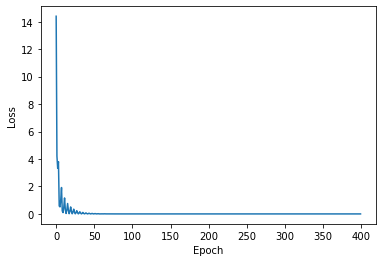

In [22]:
plt.plot(LOSS)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()